In [25]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

In [26]:
# Download data from Yahoo Finance

df = yf.download("^NSEI", start="2020-01-01", end="2024-01-09")
# df = yf.download("AAPL", start="2020-01-01", end="2024-01-09")
# df = yf.download("BTC-USD", start="2020-01-01", end="2021-09-01")

# Change column names from upper to lower case
df. columns = df.columns.str.lower()

# Delete the adj close column
df = df.drop(columns=["adj close"])

[*********************100%%**********************]  1 of 1 completed


In [27]:
# Select the data subset required for the analysis
start_row_num = -150
end_row_num = -1

Moving Average Crossover:

Concept:
 
This strategy involves using two moving averages of different periods (e.g., 50-day and 200-day moving averages). When the shorter-term moving average crosses above the longer-term moving average, it generates a buy signal, indicating a potential uptrend. Conversely, when the shorter-term moving average crosses below the longer-term moving average, it generates a sell signal, indicating a potential downtrend.

Implementation: You can implement this strategy by calculating the moving averages and monitoring their crossovers. For example, if the 50-day moving average crosses above the 200-day moving average, generate a buy signal, and vice versa.

In [28]:
# create a df_x_ema to contain a subset of df
df_x_ema = df[start_row_num: end_row_num]

# Define the moving average periods
fast_ma = 8
slow_ma = 21

# Calculate the moving averages
df_x_ema["ema_fast"] = ta.ema(df_x_ema.close, length=fast_ma)
df_x_ema["ema_slow"] = ta.ema(df_x_ema.close, length=slow_ma)

# Drop rows with NaN values
df_x_ema = df_x_ema.dropna()

C:\Users\iamlo\AppData\Local\Temp\ipykernel_1676\1417724560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["ema_fast"] = ta.ema(df_x_ema.close, length=fast_ma)
C:\Users\iamlo\AppData\Local\Temp\ipykernel_1676\1417724560.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_ema["ema_slow"] = ta.ema(df_x_ema.close, length=slow_ma)


In [29]:
# # # If fast moving average is crosses over the slow moving average the buy signal must be true
# # df_x_ema["buy_signal"] = (df_x_ema["ema_fast"] > df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) <= df_x_ema["ema_slow"].shift(1))
# # # If fast moving average is crosses below the slow moving average the sell signal must be true
# # df_x_ema["sell_signal"] = (df_x_ema["ema_fast"] < df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) >= df_x_ema["ema_slow"].shift(1))

# # # when the buy signal is true populate the price in buy_numeric column
# # df_x_ema["buy_numeric"] = np.where(df_x_ema["buy_signal"],df_x_ema["ema_slow"], np.nan)
# # # when the sell signal is true populate the price in sell_numeric column
# # df_x_ema["sell_numeric"] = np.where(df_x_ema["sell_signal"],df_x_ema["ema_slow"], np.nan)

# # # Show first few lines
# # # df_x_ema.head()

# plots_ema = [
#     # Plot the fast moving average
#     mpf.make_addplot(df_x_ema["ema_fast"], type="line"), 
#     # Plot the slow moving average
#     mpf.make_addplot(df_x_ema["ema_slow"], type="line"),
#     # # Plot the buy signal 
#     # mpf.make_addplot(df_x_ema["buy_numeric"], type="scatter", marker="^", markersize=40, color="green"),
#     # # Plot the sell signal
#     # mpf.make_addplot(df_x_ema["sell_numeric"], type="scatter", marker="v", markersize=40, color="red")
#     ]
# # Plot the candle sticks, fast ma and slow ma, trading signal markers
# mpf.plot(df_x_ema, type="candle", figratio=(15,8), addplot=plots_ema, style="yahoo")

# # These are the dates and prices on which to buy
# df_x_ema.loc[df_x_ema["buy_signal"], "ema_slow"]

# # These are the dates and prices on which to sell
# df_x_ema.loc[df_x_ema["sell_signal"], "ema_slow"]

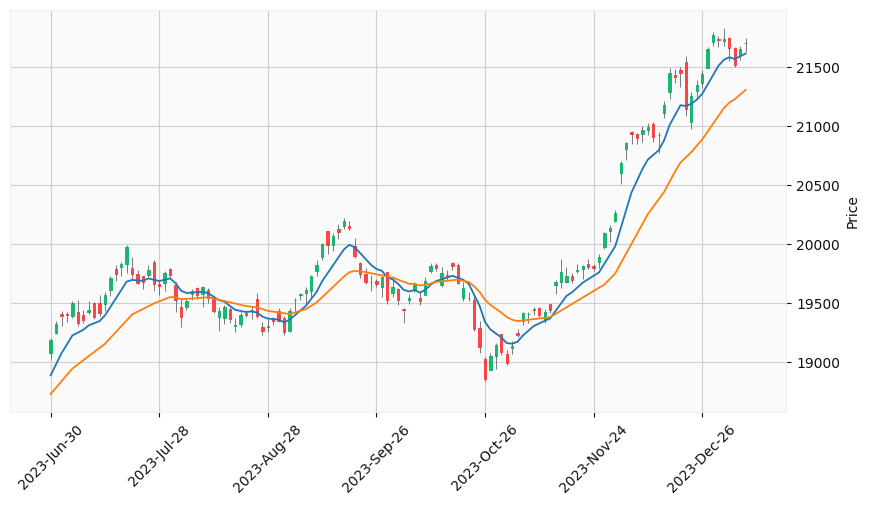

(129, 7)

In [30]:
plots_ema = [
    # Plot the moving averages
    mpf.make_addplot(df_x_ema["ema_fast"], type="line"), 
    mpf.make_addplot(df_x_ema["ema_slow"], type="line"),
    ]

# Plot the candle sticks, fast ma and slow ma, trading signal markers
mpf.plot(df_x_ema, type="candle", figratio=(15,8), addplot=plots_ema, style="yahoo")

df_x_ema.shape

In [31]:
df_x_ema.head()

,open,high,low,close,volume,ema_fast,ema_slow
Date,,,,,,,
2023-06-30,19076.849609,19201.699219,19024.599609,19189.050781,247900,18885.668015,18726.771391
2023-07-03,19246.500000,19345.099609,19234.400391,19322.550781,226100,18982.753075,18780.933154
2023-07-04,19406.599609,19434.150391,19300.000000,19389.000000,226900,19073.030169,18836.211958
2023-07-05,19405.949219,19421.599609,19339.599609,19398.500000,224400,19145.356798,18887.329053
2023-07-06,19385.699219,19512.199219,19373.000000,19497.300781,268300,19223.566572,18942.781028


In [44]:
df_x_ema["signal"] = 0

df_x_ema.loc[(df_x_ema["ema_fast"] > df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) <= df_x_ema["ema_slow"].shift(1)), "signal"] = 1
df_x_ema.loc[(df_x_ema["ema_fast"] < df_x_ema["ema_slow"]) & (df_x_ema["ema_fast"].shift(1) >= df_x_ema["ema_slow"].shift(1)), "signal"] = -1

df_x_ema["signal"].value_counts()

signal
 0    123
-1      3
 1      3
Name: count, dtype: int64

Relative Strength Index (RSI):

Concept: 
RSI measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock. Traditionally, RSI values above 70 indicate overbought conditions, suggesting a potential reversal to the downside, while RSI values below 30 indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the RSI for a given period (typically 14 days) and use threshold values (e.g., 70 and 30) to generate buy or sell signals based on overbought or oversold conditions, respectively.

In [32]:
# # Create a df_x_rsi to contain a subset of df
# df_x_rsi = df[start_row_num: end_row_num]

# # Calculate the RSI
# df_x_rsi["rsi"] = ta.rsi(df_x_rsi["close"], length=14)

# # Drop rows with NaN values
# df_x_rsi = df_x_rsi.dropna()

In [33]:
# plots_rsi = [
#     # Plot the RSI
#     mpf.make_addplot(df_x_rsi["rsi"], panel=1, ylim=[0, 100], ylabel="RSI"),
#     # Plot the overbought and oversold lines
#     mpf.make_addplot(pd.Series(70, index=df_x_rsi.index), type='line', color='r', secondary_y=False, panel=1),
#     mpf.make_addplot(pd.Series(30, index=df_x_rsi.index), type='line', color='g', secondary_y=False, panel=1)
#     ]

# # Plot the candle sticks, RSI, overbought and oversold lines
# mpf.plot(df_x_rsi, type="candle", addplot=plots_rsi, style="yahoo", figratio=(15,8))

# df_x_rsi.shape

MACD (Moving Average Convergence Divergence):

Concept: MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a stock's price. It consists of the MACD line (the difference between the 12-day and 26-day exponential moving averages) and the signal line (typically a 9-day exponential moving average of the MACD line). Bullish signals occur when the MACD line crosses above the signal line, indicating potential upward momentum, while bearish signals occur when the MACD line crosses below the signal line, indicating potential downward momentum.

Implementation: Calculate the MACD line and signal line based on the exponential moving averages and generate buy or sell signals based on their crossovers.

In [34]:
# # Create a df_x_macd to contain a subset of df
# df_x_macd = df[start_row_num: end_row_num]

# # Calculate the MACD
# macd_data = ta.macd(df_x_macd["close"]) 

# # Change the column names
# df_x_macd["macd"] = macd_data["MACD_12_26_9"]
# df_x_macd["hist"] = macd_data["MACDh_12_26_9"]
# df_x_macd["signal"] = macd_data["MACDs_12_26_9"]

# # Drop rows with NaN values
# df_x_macd = df_x_macd.dropna()

In [35]:
# plots_macd = [
#     # Plot the MACD, signal line and histogram  
#     mpf.make_addplot(df_x_macd["macd"], panel=1, type="line"),
#     mpf.make_addplot(df_x_macd["hist"], panel=1, type="bar"),
#     mpf.make_addplot(df_x_macd["signal"], panel=1, type="line", color="orange")
#     ]

# # Plot the candle sticks, MACD, signal line and histogram
# mpf.plot(df_x_macd, type="candle", style="yahoo", figratio=(15,8), addplot=plots_macd)

# df_x_macd.shape

Bollinger Bands:

Concept: Bollinger Bands consist of a middle band (typically a 20-day simple moving average) and two outer bands (calculated as two standard deviations away from the middle band). The bands expand and contract based on volatility. When the price touches or crosses the upper band, it may indicate overbought conditions, suggesting a potential reversal to the downside. Conversely, when the price touches or crosses the lower band, it may indicate oversold conditions, suggesting a potential reversal to the upside.

Implementation: Calculate the Bollinger Bands and monitor price interactions with the bands to generate buy or sell signals based on overbought or oversold conditions.

In [36]:
# # Create a df_x_bbands to contain a subset of df
# df_x_bbands = df[start_row_num: end_row_num]

# # Calculate the Bollinger Bands
# df_x_bbands.ta.bbands(close="close", length=20, std=2, append=True)

# # Drop rows with NaN values
# df_x_bbands.dropna(inplace=True)

In [37]:
# plots_bollinger = [
#     # Plot the Bollinger Bands
#     mpf.make_addplot(df_x_bbands["BBU_20_2.0"], color="lightblue"),
#     mpf.make_addplot(df_x_bbands["BBL_20_2.0"], color="lightgray"),
#     mpf.make_addplot(df_x_bbands["BBM_20_2.0"], color="pink")
#     ]

# # Plot the candle sticks, Bollinger Bands
# mpf.plot(df_x_bbands, type="candle", style="yahoo", figratio=(15,8), addplot=plots_bollinger)   

# df_x_bbands.shape